# Overview
What is Seaborn and how/why it's used

Line Plots

Summary Plots: Bar Plots

Distribution of Data: Histogram, Box Plots, Relationship Plots, Scatter Plots, lmplot (combo of regplot() and FacetGrid)

Holistic views / Combo: Sub Plots, Pair Plots, Join Plots

Correlation / Relationships: Heat Maps


# Importing packages


In [7]:
import os #provides functions for interacting with the operating system
import numpy as np # provides functions for working with arrays
import pandas as pd #provides functions for working with files..
from matplotlib import pyplot as plt 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

#Seaborn uses less code comparing to matplotlib
# !conda list Check the packages installed


# 1. Loading the Raw Data

In [8]:
df = pd.read_csv("bank.csv")

In [9]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [10]:
print("The shape of our data set: ", df.shape)

The shape of our data set:  (11162, 17)


# 2. Line Gragh

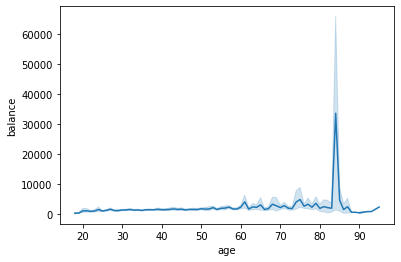

In [11]:
# Example 1 - Simple 1 line graph
# Assuming we want to investigate the balance by age

ax = sns.lineplot(x='age', y='balance', data = df)

#error bands show the confidence interval

### - Question 1 : Suppose we want to add the balance by age and deposit ( use 'hue' to add a third parameter).

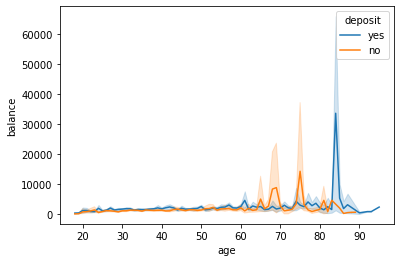

In [12]:
# Example 2 - Adding Categories

ax = sns.lineplot(x='age', y='balance', hue = 'deposit', data = df)


### - Question 2 : By Promo with style & Increase the size & Remove error bars, use style and ci.


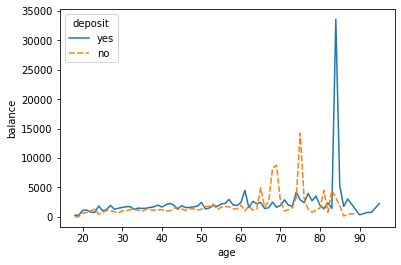

In [13]:
ax = sns.lineplot(data = df,x='age', y='balance', hue = 'deposit',style = 'deposit', ci = None)


In [ ]:
df.head()

### - Question 3 : Duration By age and deposit with style & Increase the size & Remove error bars & adding markers & by month


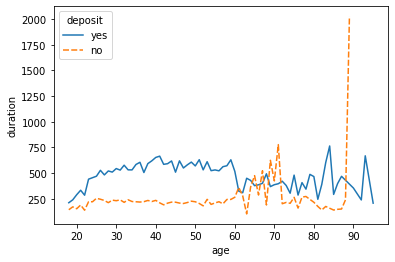

In [14]:
ax = sns.lineplot(data = df,x='age', y='duration', hue = 'deposit',style = 'deposit', ci = None)


# LinePlot Documentation

### Documentation : https://seaborn.pydata.org/generated/seaborn.lineplot.html

## Bar Plot

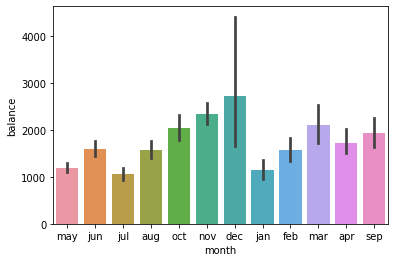

In [28]:
# Example 1 - Total balance by Month

ax = sns.barplot(x="month", y="balance", data=df)

# Notes: 
# 1 - the lines signify the confidence interval
# 2 - Takes mean by default

df[['month', 'balance']].groupby('month', as_index = False)

### Question1 :Total balance by Month - Remove the Confidence Interval


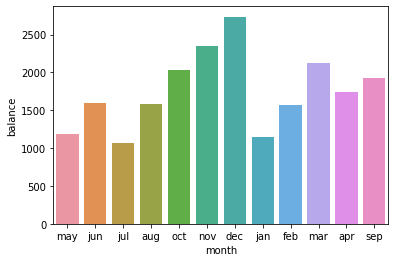

In [18]:
ax = sns.barplot(x="month", y="balance", data=df, ci=False)

### Question2 - total balance by Month - Remove the Confidence Interval - By contact


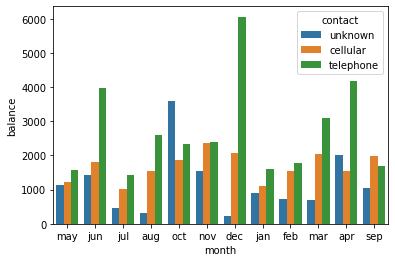

In [29]:
ax = sns.barplot(x='month', y="balance", data=df, ci=False, hue = 'contact')

### Question 3 - total balance by age - Remove the Confidence Interval - By contact - Changing direction


Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f9486132dd0> (for post_execute):


KeyboardInterrupt: ignored

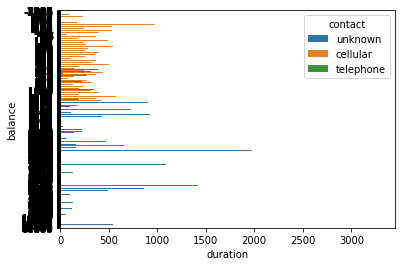

In [31]:
ax = sns.barplot(x='duration', y='balance', ci=False, hue = 'contact', orient = 'h', data=df)

# Histograms

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


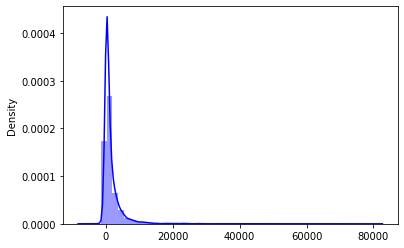

In [33]:
# Example 1 - Investigating the distribution of balance

x = df['balance'].values

sns.distplot(x, color = 'blue');

# As you can see, it's a bit imbalance. Right skewd distribution as the mean is to the right

### Question 1 : - Investigating the distribution of balance, adding the mean



In [ ]:
x = df['balance'].values

sns.distplot(x, color = 'blue');

# Calculating the mean
mean = df['balance'].mean()

#ploting the mean
plt.axvline(mean, 0,1, color = 'red')

### Question 2 : -Investigating the distribution of Visitors, adding the mean

In [ ]:
x = df['age'].values

sns.distplot(x, color = 'red');

# Calculating the mean
mean = df['age'].mean()

#ploting the mean
plt.axvline(mean, 0,1, color = 'blue')

# Box Plot

In [ ]:
# Example 1 - Investigating the distribution of age

x = df['age'].values

ax = sns.boxplot(x)

print('The meadian is: ', df['age'].median())

# Notes:
# The line signifies the median
# The box in the middle show the beginning of Q1 (25th percentile) and the end of the Q3 (75th percentile)
# The whiskers (left - right) show the minimum quartile and maximum quartile
# The dots on the right are "outliers"


### Question 1 : - Investigating the distribution of balance by age --- Change color


In [ ]:
ax = sns.boxplot(x="age", y="balance", data=df, color = '#EE67CF')


Question 2 : - Investigating the deposit of Revenue by age - changing color - adding hue


In [ ]:

ax = sns.boxplot(x="day", y="deposit", data=df, color="#B971E7")

# Cool Way to pick colours
# https://htmlcolorcodes.com/color-picker/

# More on Boxplots here:

https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


no     5873
yes    5289
Name: deposit, dtype: int64

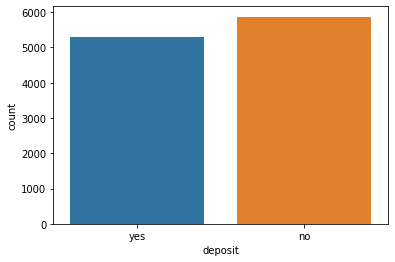

In [34]:
# Explore the target variable
sns.countplot(df['deposit'])
df['deposit'].value_counts()

In [ ]:
# We will revist the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True)

In [ ]:
df.isna().sum()